# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Ilia's Observation

	1. The temperature declines as latitude increases in Northern Hemisphere and the temperature increases as latitude goes up in Southern Hemisphere.
    
	2. The humidity declines as latitude goes up in Northern Hemisphere, and it slightly increases with higher latitude in Southern Hemisphere. Southern Hemisphere climates seems to be milder than in the Northern Hemisphere due to more ocean and water.
    
	3. There is a lower cloudiness with higher latitude in Northern hemisphere and higher cloudiness as latitude increases in Southern Hemisphere. The wind speed is higher as the latitude goes up in Northern Hemisphere, and it is lower as the latitude increases in Southern Hemisphere. It appears that the latitude doesn't have a significant influence on wind speed.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from datetime import date
from datetime import datetime
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

In [4]:
# Create a list
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [5]:
print("Beginning Data Retrieval ")
print("-----------------------------")

# For each city name in cities list
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
            
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-------------------------------")
print("Data Retrieval Complete")
print("--------------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : hobart
Processing Record 2 of Set 1 : souillac
Processing Record 3 of Set 1 : victoria
Processing Record 4 of Set 1 : kanlagay
Processing Record 5 of Set 1 : vaini
Processing Record 6 of Set 1 : iqaluit
Processing Record 7 of Set 1 : punta arenas
Processing Record 8 of Set 1 : carnarvon
Processing Record 9 of Set 1 : yulara
Processing Record 10 of Set 1 : mataura
Processing Record 11 of Set 1 : kapaa
Processing Record 12 of Set 1 : sault sainte marie
Processing Record 13 of Set 1 : bitung
City not found. Skipping...
Processing Record 14 of Set 1 : esperance
Processing Record 15 of Set 1 : rikitea
City not found. Skipping...
Processing Record 16 of Set 1 : ilulissat
Processing Record 17 of Set 1 : tanabi
Processing Record 18 of Set 1 : grand gaube
Processing Record 19 of Set 1 : bethel
Processing Record 20 of Set 1 : severo-kurilsk
Processing Record 21 of Set 1 : arman
City not found. Skipping...
Proc

Processing Record 28 of Set 4 : snasa
City not found. Skipping...
Processing Record 29 of Set 4 : san juan
Processing Record 30 of Set 4 : horqueta
Processing Record 31 of Set 4 : lemon tree passage
Processing Record 32 of Set 4 : klaksvik
Processing Record 33 of Set 4 : alofi
Processing Record 34 of Set 4 : bourail
Processing Record 35 of Set 4 : bolotesti
Processing Record 36 of Set 4 : provideniya
Processing Record 37 of Set 4 : silvan
Processing Record 38 of Set 4 : taltal
Processing Record 39 of Set 4 : bereda
Processing Record 40 of Set 4 : lincoln
Processing Record 41 of Set 4 : hay river
Processing Record 42 of Set 4 : ushibuka
Processing Record 43 of Set 4 : casablanca
Processing Record 44 of Set 4 : baoning
Processing Record 45 of Set 4 : genhe
Processing Record 46 of Set 4 : fengrun
Processing Record 47 of Set 4 : tanout
Processing Record 48 of Set 4 : san quintin
Processing Record 49 of Set 4 : ranong
Processing Record 50 of Set 4 : lompoc
Processing Record 0 of Set 5 : wes

Processing Record 13 of Set 8 : dembi dolo
Processing Record 14 of Set 8 : isangel
Processing Record 15 of Set 8 : sundargarh
Processing Record 16 of Set 8 : surin
Processing Record 17 of Set 8 : ampanihy
Processing Record 18 of Set 8 : kushima
Processing Record 19 of Set 8 : sorong
Processing Record 20 of Set 8 : worthington
Processing Record 21 of Set 8 : palmerston
Processing Record 22 of Set 8 : ankazoabo
Processing Record 23 of Set 8 : nyrob
City not found. Skipping...
Processing Record 24 of Set 8 : byron bay
Processing Record 25 of Set 8 : nouakchott
Processing Record 26 of Set 8 : komsomolskiy
Processing Record 27 of Set 8 : nouadhibou
Processing Record 28 of Set 8 : quatre cocos
Processing Record 29 of Set 8 : mayenne
Processing Record 30 of Set 8 : chowchilla
Processing Record 31 of Set 8 : nanakuli
Processing Record 32 of Set 8 : vila
Processing Record 33 of Set 8 : kaeo
Processing Record 34 of Set 8 : dicabisagan
Processing Record 35 of Set 8 : cavalcante
Processing Record 

Processing Record 48 of Set 11 : mainburg
Processing Record 49 of Set 11 : bad doberan
Processing Record 50 of Set 11 : kodinsk
Processing Record 0 of Set 12 : ponta delgada
Processing Record 1 of Set 12 : bonnyville
Processing Record 2 of Set 12 : vila velha
Processing Record 3 of Set 12 : doha
Processing Record 4 of Set 12 : golden
Processing Record 5 of Set 12 : aklavik
Processing Record 6 of Set 12 : naryshkino
-------------------------------
Data Retrieval Complete
--------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create the data frame
weather_data = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [7]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        567 non-null    object 
 1   Cloudiness  567 non-null    int64  
 2   Country     567 non-null    object 
 3   Date        567 non-null    int64  
 4   Humidity    567 non-null    int64  
 5   Lat         567 non-null    float64
 6   Lng         567 non-null    float64
 7   Max Temp    567 non-null    float64
 8   Wind Speed  567 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 40.0+ KB


In [8]:
# Display the Data Frame
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hobart,20,AU,1659931831,69,-42.8794,147.3294,52.27,5.75
1,Souillac,9,MU,1659931861,78,-20.5167,57.5167,69.91,7.99
2,Hong Kong,60,HK,1659931842,89,22.2855,114.1577,84.38,5.99
3,Kanlagay,91,PH,1659931861,66,5.8757,121.2915,84.29,4.43
4,Vaini,20,TO,1659931861,94,-21.2000,-175.2000,78.96,9.22


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
weather_data.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,567.000000,5.670000e+02,567.000000,567.000000,567.000000,567.000000,567.000000
mean,51.738977,1.659932e+09,72.128748,19.926335,20.009572,68.615432,8.066173
std,39.497939,1.594630e+02,19.702272,33.714297,92.121552,13.783243,5.763811
min,0.000000,1.659931e+09,1.000000,-54.800000,-175.200000,32.900000,0.000000
25%,9.000000,1.659932e+09,62.000000,-9.406100,-58.103850,58.210000,3.815000
50%,54.000000,1.659932e+09,76.000000,24.700000,20.040300,70.520000,6.760000
75%,95.000000,1.659932e+09,87.000000,49.787300,103.772050,79.845000,11.020000
max,100.000000,1.659932e+09,100.000000,78.218600,179.316700,97.810000,36.930000


In [10]:
#  Get the indices of cities that have humidity over 100%.
weather_data.loc[weather_data['Humidity']>100,:]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [11]:
# Save city data into a csv file
weather_data.to_csv("../output_data/cities.csv", index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

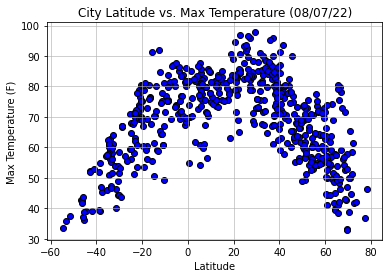

In [12]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], facecolor = "blue", edgecolor = "black")

# Set the title
plt.title("City Latitude vs. Max Temperature (08/07/22)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.6)

# Save the figure
plt.savefig("../Images/City Latitude vs Max Temperature.png")

The temprerature and latitude both increase until the latitude reaches to 39-40, then the temperature declines as the latitude drops.

## Latitude vs. Humidity Plot

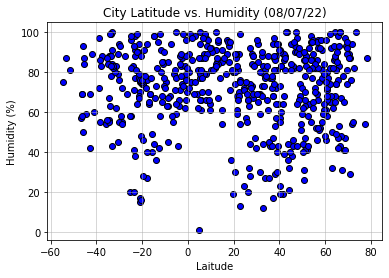

In [13]:
# Create Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], facecolor = "blue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (08/07/22)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("../Images/City Latitude vs. Humidity.png")

The graph indicates there is not a significant correlation between humidity and latitude.

## Latitude vs. Cloudiness Plot

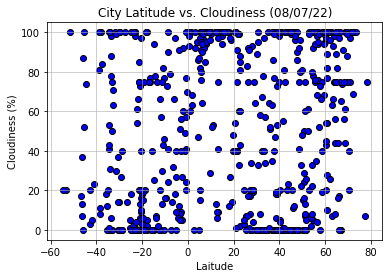

In [14]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], facecolor = "blue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (08/07/22)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.6)

# Save the figure
plt.savefig("../Images/City Latitude vs. Cloudiness.png")

The cloudiness data is widely spread across the latitude, and this shows there is not any correlation between Cloudiness and latitude.


## Latitude vs. Wind Speed Plot

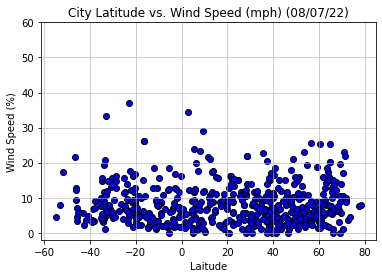

In [15]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], facecolor = "blue", edgecolor = "black")

plt.title("City Latitude vs. Wind Speed (mph) (08/07/22)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,60)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.6)

# Save the figure
plt.savefig("../Images/City Latitude vs. Wind Speed.png")

There is no correlation between wind speed and cities latitude.


## Linear Regression

In [16]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_data.loc[weather_data["Lat"] >= 0]
southern_hemisphere = weather_data.loc[weather_data["Lat"] < 0]

# Define function to create linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="blue")

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.65


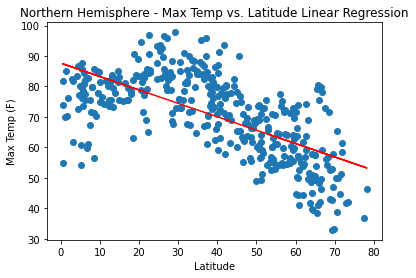

In [17]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

There is a strong negative correlation between latitude and max temperature for northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.8


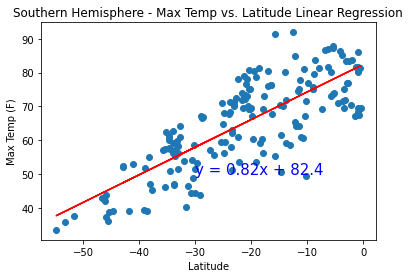

In [18]:
# Set function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Set function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

This reflects a strong positive correlation between latitude and max temperature for southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.08


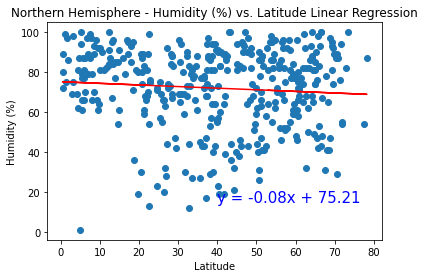

In [19]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

There is a moderate negative correlation between latitude and humidity for northern hemisphere.

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression


The r-squared is : 0.01


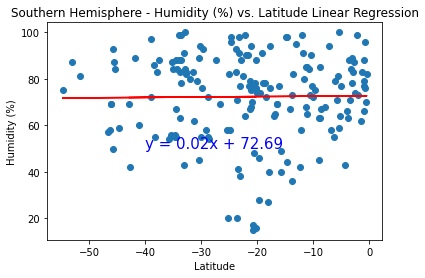

In [20]:
# Set function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Set function #2
annotate(equation, -40, 50)

# Set the title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

There is a moderate negative correlation between latitude and humidity for southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.03


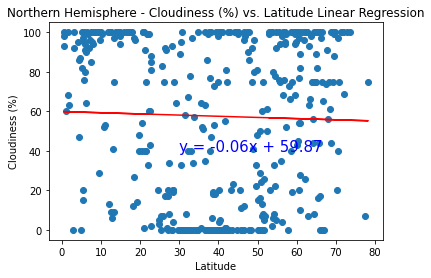

In [21]:
# Set Function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Set Function #2
annotate(equation, 30, 40)

# Set the title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

There is no correlation between latitude and cloudiness for northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.01


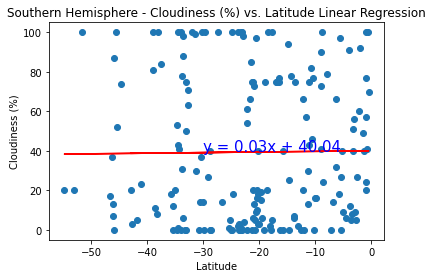

In [22]:
# Set function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Set function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

There is a weak positive correlation between latitude and cloudiness for Southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.02


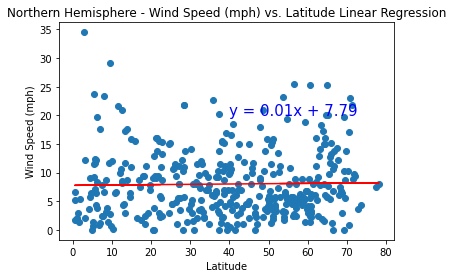

In [23]:
# Set function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Set function #2
annotate(equation, 40, 20)

# Set the title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

There is a moderate positive correlation between latitude and wind speed for Northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.12


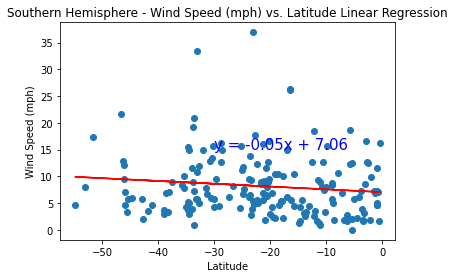

In [24]:
# Set function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Set function #2
annotate(equation, -30, 15)

# Set the title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

There is a moderate negative correlation between latitude and wind speed for southern hemisphere.